<img src="https://res.cloudinary.com/jamf05/image/upload/v1599341642/random-uploads/ntflbp455om2yhvsafbm.jpg">

## Clasificación de Emociones usando NLP

In [ ]:
#@title 1. Montar drive (If you are in in colab){ display-mode: "form" }

import os
from google.colab import drive
path =  "/content/drive/My Drive/Colab Notebooks/Python/Proyectos/20201-ai2-class-project"#@param {type:"string"}
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Python/Proyectos/20201-ai2-class-project


In [ ]:
#@title 2. Load libraries { display-mode: "form" }
#@title 2. Load libraries { display-mode: "form" }
import numpy as np
import pandas as pd 
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import json
import os
import tensorflow as tf
from tqdm import tqdm
import seaborn as sb
import seaborn as sns
from nltk.corpus import stopwords
import string
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('stopwords')
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def text_process(mess):
    """
    Tomamos una cadena de texto y le realizamos lo siguiente
    1. Remueve toda la puntuacion
    2. Remover todas las palabras vacias
    3. Retorna una lista con el texto "limpio"
    """
    # Verificamos los caracteres para ver si poseen algun tipo de en puntuación
    nopunc = [char for char in mess if char not in string.punctuation]

    # Vuelve a unir los caracteres para formar la cadena.
    nopunc = ''.join(nopunc)
    
    # Ahora se eliminan las palabras vacías
    word_seq=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return word_seq

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Integrantes:**

- Jorge Andres Mogotocoro Fajardo - 2160075
- Elkin Darío Fernández Celis - 2151856

### Objetivo general

- Clasificar oraciones asociadas a un sentimiento usando NLP.

### Objetivos especificos

- Recopilar textos marcados con una emoción o en su defecto publicaciones con sus respectivas reacciones.
- Limpiar el conjunto de datos aplicando técnicas de procesamiento de texto.
- Entrenar un modelo recurrente a partir del conjunto de datos procesado.

### Preguntas por responder

- **¿Como se va resolver?**  
R: Partiendo de un conjunto de datos inicial de 20 mil oraciones etiquetadas cada una con un sentimiento entre los que pueden ser surprise love anger joy sadness y fear se entrenó un modelo RNN con el fin de contar con un modelo recurrente capaz de apartir de una oracion dar un sentimiento asociado. En un segundo experimento, al ver que el conjunto de datos inicial era insuficiente y ademas se encontraba sumamente simplificado se armó un dataset mayor añadiendo contenido de publicaciones en facebook con sus respectivas reacciones surprise, love, anger, joy y sadness.
- **¿Por qué se necesita resolver este problema?**  
R: Porque queremos aplicar los conceptos vistos de redes neuronales recurrentes en un campo que se desepeña muy bien como lo es el del analisis de lenguaje natural.
- **¿Para que?**  
R: Para contar con una herramienta de valoracion de texto y en un futuro implementarla a una aplicacion que dependa fuertemente de las reseñas de algun tipo de contenido de interes como lo puede ser una tienda de aplicaciones, un portal de reseñas de peliculas entre otros y como dato personal actualmente me encuentro desarrollando una aplicacion centrada en recopilar informacion de pequeños negocios para lo cual un sistema de valoracion por medio de comentarios vendria a ser un valor agregado en la aplicacion.
- **¿Para quien(es) seria util esta solucion?**  
R: Todas aquellas plataformas que manejen una base de usuarios que les pueda servir como punto de reseña de los productos que son presentados, tambien a creadores de contenidos para facilitar su gestion de comentarios por medio de valorar automaticamente el sentimiento que pueda tener un comentario en su video y tener un reporte global de la reaccion que pueda generar su contenido.

### Documentacion del problema



- **¿Que es el procesamiento de lenguaje natural?**

    **R**: Es una disciplina que se centra en la interacción entre la ciencia de datos y el lenguaje humano, y se está ampliando a muchas industrias.

    - Básicamente extraer información relevante del lenguaje natural.
- **¿A quien les puede ser de ayuda?**

    **R**: El procesamiento del lenguaje natural (PLN o NLP), se utiliza actualmente en diferentes áreas y para distintas funciones, como por ejemplo:

    - Comprensión del lenguaje natural (CLN o NLU)
    - Generación del lenguaje natural (GLN o NLG)
    - Recuperación de información (RI o IR)
    - Reconocimiento y síntesis del habla
    - Traducción automática
    - Resumen y clasificación de textos
    - **Detección de sentimientos o emociones**

        Uno de los usos más novedosos del PLN es el análisis de sentimientos. Cada vez más empresas y profesionales del **marketing están utilizando esta tecnología para saber qué sienten los usuarios sobre una marca**, producto o servicio, utilizando datos de entrada como mensajes, comentarios o reacciones en diferentes redes sociales.

- **Nombrar técnicas que se utilizan**

    **R**:

    - **Bolsa de palabras**: Básicamente, podemos inferir la idea principal de un documento contando la aparición de palabras en el texto.
        - No se tiene en cuenta el orden ni relaciones de las palabras en el texto original
        - La ocurrencia se obtiene con respecto a un Diccionario
        - La mayor ocurrencia de palabras representa palabras clave de texto
    - **Tokenización**: En esencia, es la tarea de cortar un texto en trozos llamados tokens. Aquí, los tokens pueden ser palabras, caracteres o subpalabras.
- **¿En qué consiste el análisis de sentimientos?**

    **R**: El análisis de sentimientos es una herramienta de aprendizaje automático que analiza los textos en busca de polaridad, de positivo a negativo. Al entrenar herramientas de aprendizaje automático con ejemplos de emociones en texto, las máquinas aprenden automáticamente a detectar sentimientos sin intervención humana.

    - **Modelos de análisis de sentimiento**

        **La idea aquí es que si tienes un montón de ejemplos de entrenamiento, como ¡Estoy tan feliz hoy! , Mantente feliz San Diego , El café hace feliz a mi corazón , etc.**

    A partir de esto, el modelo debería poder captar el hecho de que la palabra “feliz” está correlaci

    onada con el texto que tiene un sentimiento positivo y usarlo para predecir futuros ejemplos sin etiquetas.

    La regresión logística es un buen modelo porque se entrena rápidamente incluso en grandes conjuntos de datos y proporciona resultados muy sólidos. Otras buenas opciones de modelos incluyen SVM, Random Forest y Naive Bayes.

    **Modelos más avanzados**

    La mayoría de los modelos de sentimiento avanzados comienzan transformando el texto de entrada en una representación incrustada. Estas incrustaciones a veces se entrenan junto con el modelo, pero por lo general se puede lograr una precisión adicional utilizando incrustaciones previamente entrenadas como Word2Vec, GloVe, BERT o FastText.

    Redes neuronales convolucionales Sorprendentemente, un modelo que funciona particularmente bien en las tareas de análisis de sentimientos es la red neuronal convolucional , que se usa más comúnmente en modelos de visión por computadora . La idea es que en lugar de realizar convoluciones en píxeles de la imagen, el modelo puede realizar esas convoluciones en el espacio de características incrustadas de las palabras en una oración. Dado que las convoluciones se producen en palabras adyacentes, el modelo puede captar negaciones o n-gramas que llevan información de sentimiento novedosa.

    Los LSTM y otras redes neuronales recurrentes Los RNN son probablemente los modelos de aprendizaje profundo más utilizados para la PNL y con razón. Debido a que estas redes son recurrentes, son ideales para trabajar con datos secuenciales como texto. En el análisis de sentimientos, se pueden usar para predecir repetidamente el sentimiento a medida que se ingiere cada token en un fragmento de texto. Una vez que el modelo está completamente entrenado, la predicción del sentimiento es solo la salida del modelo después de ver todos los n tokens en una oración.

    Los RNN también pueden mejorarse en gran medida mediante la incorporación de un mecanismo de atención , que es un componente del modelo entrenado por separado. La atención ayuda a un modelo a determinar en qué tokens de una secuencia de texto aplicar su enfoque, lo que permite que el modelo consolide más información en más intervalos de tiempo.

- **¿Que trabajos previos existen?**

    **R**:

    - **Stanford: Sentiment Analysis** [[++](https://nlp.stanford.edu/sentiment/)]

        Modelos profundos recursivos para la composicionalidad semántica sobre un árbol de sentimientos. La mayoría de los sistemas de predicción de sentimientos funcionan simplemente **mirando las palabras de forma aislada**, dando puntos positivos para palabras positivas y puntos negativos para palabras negativas y luego resumiendo estos puntos. En contraste, nuestro nuevo modelo de aprendizaje profundo **construye una representación de oraciones completas basadas en la estructura de la oración**. Calcula el sentimiento basándose en cómo las palabras componen el significado de frases más largas. La tecnología subyacente de esta demostración se basa en un nuevo tipo de red neuronal recursiva que se basa en estructuras gramaticales.

    - **Universidad de California en San Diego: Amazon Review Data (2018)** [[++](https://nijianmo.github.io/amazon/index.html)]

        Este conjunto de datos incluye **reseñas** (calificaciones, texto, votos útiles), metadatos del producto (**descripciones, información de categoría, precio, marca y características de imagen**). , y enlaces (gráficos también vistos / también comprados).

    - **Sentiment140 dataset with 1.6 million tweets** [[++](https://www.kaggle.com/kazanova/sentiment140)]
    - **IMDB Dataset of 50K Movie Reviews** [[++](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)]


### Implementacion

#### Cargando data 1 procesada

In [ ]:
df_train = pd.read_csv("data/train.txt", delimiter=';', header=None, names=['sentence','label'])
df_val = pd.read_csv("data/val.txt", delimiter=';',header=None, names=['sentence','label'])
df_test = pd.read_csv("data/test.txt", delimiter=';',header=None, names=['sentence','label'])
df = pd.concat([df_train,df_test,df_val])

In [ ]:
text = df['sentence'].apply(text_process)
text_train = df_train['sentence'].apply(text_process)
text_val = df_val['sentence'].apply(text_process)
text_test = df_test['sentence'].apply(text_process)

In [ ]:
max_len = 100
max_words = 20000
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(text)
sequences_train = tokenizer.texts_to_sequences(text_train)
sequences_val = tokenizer.texts_to_sequences(text_val)
sequences_test = tokenizer.texts_to_sequences(text_test)

In [ ]:
data_train = pad_sequences(sequences_train,maxlen=max_len)
data_val = pad_sequences(sequences_val,maxlen=max_len)
data_test = pad_sequences(sequences_test,maxlen=max_len)

**Datos de Entrenamineto**

In [ ]:
x_train = np.load('data/x_train.npy')
y_train = np.load('data/y_train.npy')

print("Entrenamiento: ",x_train.shape,y_train.shape)

Entrenamiento:  (16000, 100) (16000, 6)


**Datos de Test**

In [ ]:
x_test = np.load('data/x_test.npy')
y_test = np.load('data/y_test.npy')

print("Test: ",x_test.shape,y_test.shape)

Test:  (2000, 100) (2000, 6)


**Datos de val**

In [ ]:
x_val = np.load('data/x_val.npy')
y_val = np.load('data/y_val.npy')

print("Validacion: ",x_val.shape,y_val.shape)

Validacion:  (2000, 100) (2000, 6)


#### Cargando data 2 procesada

In [ ]:
x_test = np.load('data processed/x_test_model_1_exp_2.npy')
y_test = np.load('data processed/y_test_model_1_exp_2.npy')

#### Experimentos

##### Experimento 1, modelo 1 LSTM

Teniendo en cuenta que buscamos predecir un sentimiento dado una sequencia de texto construimos una arquitectura con una celda LSTM, que a nuestro parecer es la mas indicada para trabajar con las oraciones, aunque perfectamente podria ser una RNN debido a que las sequencias no son tan largas, como para los ejemplos de generacion de texto expuestos en la clase. No siendo más se procede con el montaje de la Arquitectura

In [ ]:
#Funcion para crear el modelo, recibe el max de palabras
def crear_modelo(max_words):
  #Modelo sequencial de agregacion de capas
  model = tf.keras.models.Sequential()
  #Para este caso el word embedding sera relacionado a la dimension de nuestro conjunto de palabras
  model.add(tf.keras.layers.Embedding(max_words,64, input_length=max_len))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, activation='tanh',name='bilstm_layer1')))
  #Agregamos una capa de Dropout del 20% de las neuronas
  model.add(tf.keras.layers.Dropout(0.2))
  #Capa intermedia densa
  model.add(tf.keras.layers.Dense(units=64,activation=tf.keras.activations.relu))
  #Capa final del onehot Encoding
  model.add(tf.keras.layers.Dense(6,activation=tf.keras.activations.softmax))
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam())
  # Presentacion de la arquitectura
  model.summary()
  return model

Instanciamos el modelo

In [ ]:
max_len = 100
max_words = 20000
model = crear_modelo(max_words)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               197632    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 1,494,470
Trainable params: 1,494,470
Non-trainable params: 0
_________________________________________________________________


Empezamos el entrenamiento, pero antes definimos las funciones de callbacks, una para detener el entrenamiento cuando no mejore mas y la otra para ir almacenando el modelo luego de cada entrenamiento

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('models/sentimiento_modelLSTM_v1.h5', monitor='loss', save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss')

In [ ]:
#Definimos una funcion de CALLBACK para detener el modelo cuando 
historial = model.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=150, callbacks=[model_checkpoint,early_stopping])

Epoch 1/150
500/500 [==============================] - 94s 189ms/step - loss: 1.0660 - accuracy: 0.5990 - val_loss: 0.5629 - val_accuracy: 0.8070
Epoch 2/150
500/500 [==============================] - 94s 189ms/step - loss: 0.3044 - accuracy: 0.8982 - val_loss: 0.3175 - val_accuracy: 0.8880
Epoch 3/150
500/500 [==============================] - 94s 188ms/step - loss: 0.1229 - accuracy: 0.9570 - val_loss: 0.3218 - val_accuracy: 0.8940


Grafica de precision de los datos de validacion junto con la perdida y la precision de entrenamiento

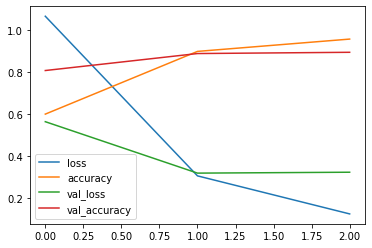

In [ ]:
losses=pd.DataFrame(historial.history)
losses.plot()

###### Resultados

In [ ]:
model = tf.keras.models.load_model('models/sentimiento_modelLSTM_v1.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           1280000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               197632    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 1,494,470
Trainable params: 1,494,470
Non-trainable params: 0
_________________________________________________________________


In [ ]:
label2int = {
  "anger": 0,
  "joy": 1,
  "love": 2,
  "sadness": 3,
  "fear": 4,
  "surprise": 5
}

In [ ]:
int2label = {
  4: "sadness",
  2: "joy",
  3: "love",
  0: "anger",
  1: "fear",
  5: "surprise"
}

**Resultados en test**

In [ ]:
predict = model.predict(x_test)
sorting = (-y_test).argsort()
sorting_predicted = (-predict).argsort()
print(classification_report(sorting[:,0],
                            sorting_predicted[:,0],
                            target_names=label2int.keys(),
                            digits=len(label2int)))

              precision    recall  f1-score   support

     sadness   0.908425  0.901818  0.905109       275
         joy   0.859091  0.843750  0.851351       224
        love   0.942029  0.935252  0.938628       695
       anger   0.807453  0.817610  0.812500       159
        fear   0.930807  0.972461  0.951178       581
    surprise   0.795918  0.590909  0.678261        66

    accuracy                       0.910500      2000
   macro avg   0.873954  0.843633  0.856171      2000
weighted avg   0.909339  0.910500  0.909271      2000



**Resultados sobre lenguaje natural**

In [ ]:
example = "i feel like i m accomplishing something and when i feel passionate about life"
example = "ive been feeling jealous lately of bloggers going off to author readings and book si"
example = "How the fu*k! Who the heck! moved my fridge!... should I knock the landlord door. #angry #mad ##"

df_example = pd.DataFrame([example], columns = ['sentence']) 
text_example = df_example['sentence'].apply(text_process)
text_example

0    [fuk, heck, moved, fridge, knock, landlord, do...
Name: sentence, dtype: object

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text)
sequence = tokenizer.texts_to_sequences(text_example)
data_example = pad_sequences(sequence, maxlen=max_len)

In [ ]:
predict = model.predict(data_example)
predict*10000

array([[9.9409189e+03, 4.8135296e+01, 1.0238465e+00, 6.6128116e+00,
        2.4369924e+00, 8.7251627e-01]], dtype=float32)

In [ ]:
sorting_predicted = (-predict).argsort()
print(sorting_predicted)
print(sorting_predicted[:,0])
print(int2label[sorting_predicted[:,0][0]])

[[0 1 3 4 2 5]]
[0]
anger


###### Evaluando el modelo sobre otro conjunto de datos

In [ ]:
#Representacion del onehot encoding
y_test

array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

Cargamos el modelo para realizar la prueba

In [ ]:
modelo_entrenado= tf.keras.models.load_model('models/sentimiento_modelLSTM_v1.h5')
modelo_entrenado.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           1280000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               197632    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 1,494,470
Trainable params: 1,494,470
Non-trainable params: 0
_________________________________________________________________


In [ ]:
label2int = {
  "anger": 0,
  "fear": 1,
  "joy": 2,
  "love": 3,
  "sadness": 4,
  "surprise": 5
}
int2label = {
  4: "sadness",
  2: "joy",
  3: "love",
  0: "anger",
  1: "fear",
  5: "surprise"
}

In [ ]:
label2int.keys()

dict_keys(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'])

In [ ]:
(-y_test).argsort()
predict = modelo_entrenado.predict(x_test)
sorting = (-y_test).argsort()
sorting_predicted = (-predict).argsort()
print(classification_report(sorting[:,0],
                            sorting_predicted[:,0],
                            target_names=label2int.keys(),
                            digits=len(label2int)))

              precision    recall  f1-score   support

       anger   0.225055  0.215728  0.220293       941
        fear   0.250000  0.077963  0.118860      1257
         joy   0.239052  0.369180  0.290196       902
        love   0.000000  0.000000  0.000000         1
     sadness   0.201586  0.206977  0.204246       860
    surprise   0.000000  0.000000  0.000000         1

    accuracy                       0.204947      3962
   macro avg   0.152616  0.144975  0.138932      3962
weighted avg   0.230948  0.204947  0.200432      3962



In [ ]:
predict = modelo_entrenado.predict(x_test)
sorting = (-y_test).argsort()
sorting_predicted = (-predict).argsort()
print(classification_report(sorting[:,0],
                            sorting_predicted[:,0],
                            target_names=label2int.keys(),
                            digits=len(label2int)))

              precision    recall  f1-score   support

       anger   0.225055  0.215728  0.220293       941
        fear   0.250000  0.077963  0.118860      1257
         joy   0.239052  0.369180  0.290196       902
        love   0.000000  0.000000  0.000000         1
     sadness   0.201586  0.206977  0.204246       860
    surprise   0.000000  0.000000  0.000000         1

    accuracy                       0.204947      3962
   macro avg   0.152616  0.144975  0.138932      3962
weighted avg   0.230948  0.204947  0.200432      3962



In [ ]:
df['label_predict'] = np.argmax(modelo_entrenado.predict(data_full),axis=-1)
df.head(15)

,sentence,label,sentence_normalized,label_predict
0,You make me breathless.,fear,make breathless,2
1,@Thebeast_ufc what happened to the suicide twe...,anger,happened suicide tweet joke obviously could of...,2
2,"Hello my dear friends, I will be back online t...",sadness,hello dear friends back online friday night mi...,4
3,@sebbyD27850 both are nonsensical. If there's ...,anger,nonsensical injustice blacks add destroying bl...,0
4,Lisa: Getting what you want all the time will ...,sadness,lisa getting want time ultimately leave unfulf...,2
5,@IndigoHawthorne Then u understand that rage i...,anger,u understand rage often pretty controlled rati...,2
6,Ffs dreadful defending,sadness,ffs dreadful defending,0
7,Dunno y am going to the Yorkshire scare ground...,fear,dunno going yorkshire scare grounds lasted min...,3
8,*ZETH voice*: Hit The Target \n (holds up upsi...,joy,zeth voice hit target n holds upside cheering ...,2
9,@PatBlanchfield so you mean “like Uber but for...,fear,mean like uber despair someone driver,2


###### Conclusiones

Tenemos entonces que nuestro modelo entrenado, en realidad esta muy sobreentrenado y nos obtuvo una mala precision dado otro conjunto de datos etiquetados, correspondientes a tweets clasificados con su respectivo sentimiento, al respecto esto puede ser debido a varios factores como nuestro word embedding no fue suficiente para encontrar una relacion entre las palabras, ademas de que las palabras en twitter muchas veces pudieron estar mal escritas y nuestro preprocesamiento no es suficiente para filtrar la gramatica, en general las metricas de **Precisión:** que nos indica de que los casos clasificados como positivos tienen un porcentaje muy bajo para ser clasificados correctamente, es decir mis datos clasificados como un sentimiento, cuales de estos si correspondian verdaderamente a este, con el **recall** es de los casos que realmente representaban ese sentimiento, cuales fueron clasificados correctamente, el **F1 score** que es una media armonica ponderada de la precision me sirve para comparar con otros modelos de clasificacion, para escoger el mejor en este caso, este modelo es muy malo.

##### Experimento 2, modelo 2 LSTM

**Procesamiento**

Se procede a aplicar otro procesamiento mas con el fin de eliminar todos los @, # y demas caracteres especiales que puedan ser innecesarios. Luego de una exhaustiva busqueda, en pos de mejorar los resultados, se busca mejorar el modelo con el que pudimos ver que obtuvimos podria mejorar sustancialmente, asi que nos enfoncamos en encontrar mejores datos para entrenar el modelo, ademas de mejores tecnicas para preprocesar datos, esto en busqueda de solucionar los problemas de palabras mal escritas, sin sentido y hacer el texto mas comprensible de tal forma que al tokenizarlo y secuenciarlo númericamente, nuestro modelo pueda trabajr mejor y darnos un mejor resultado, esto enfocados en realizar una mejor prediccion a los sentimientos expresados en un comentario, un estado o un tweet. De tal forma que cargamos el nuevo compendio de datos 

In [ ]:
data_78980 = pd.read_json('data processed/data_78980.json')
print(data_78980.shape)
print(data_78980.label.unique())
data_78980.head()

(78980, 2)
['surprise' 'love' 'anger' 'joy' 'sadness']


,sentence,label
0,The New England Patriots have parted ways with...,surprise
1,Pres. Barack Obama says he thinks the 'anti-LG...,love
2,"I am spell-bound by the sound of French , infu...",anger
4,"WATCH: TODAY is live on Facebook this morning,...",surprise
5,That hilarious moment Prince booted Kim Kardas...,joy


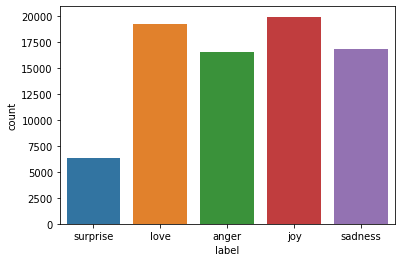

In [ ]:
sns.countplot(data_78980['label'])

Procedemos a revisar las oraciones contenidas en el dataset

In [ ]:
data_78980.sentence.values[0:20]

array(['The New England Patriots have parted ways with two familiar players',
       'Pres. Barack Obama says he thinks the \'anti-LGBT\' laws recently passed in North Carolina and Mississsippi "are wrong and should be overturned." http://abcn.ws/1WLc7Pw',
       "I am spell-bound by the sound of French , infuriated when I can't read it in the books I am given . ",
       'WATCH: TODAY is live on Facebook this morning, giving viewers the latest on Hurricane Matthew.',
       'That hilarious moment Prince booted Kim Kardashian West off stage will live on forever.',
       'Accept the challenges so that you can feel the exhilaration of victory. #FocusX10 #motivation #motivationalquotes #quoteoftheday',
       'Fast-moving brush fire in Santa Barbara County grows to 1,100 acres, threatening nearby structures. http://abcn.ws/25ZQzFb',
       "Kim Kardashian West and Kourtney Kardashian's daughters have brand new looks! (via People Babies)",
       "A small , happy man with a white beard , 

In [ ]:
freq = pd.Series(' '.join(data_78980['sentence']).split()).value_counts()[-10:]
freq

throughtout    1
deluxe         1
3:             1
@veryeloise    1
yesubais       1
food;          1
illicits       1
times,'        1
work…          1
beards,        1
dtype: int64

In [ ]:
def punctuation_removal(df):
    df['tweet'] = df['tweet'].str.replace('[^\w\s]','')
    print(df['tweet'].head())
frasen

In [ ]:
x=['hello, i am bobby','hello, i am bobby','hello, i am bobby','hello, i am bobby','hello, i am bobby']
frase = [str(TextBlob(word).correct()) for word in x]
type(frase)

list

In [ ]:
#title Funcion de normalizacion
def normalizar(tweet):
    #Filtramos las cuentas etiquetadas con  @, es decir @user se ira
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    #Eliminar url por medio de un re.sub
    TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    #Usamos la expresion regular dada para eliminar los links
    text = re.sub(TEXT_CLEANING_RE, ' ', str(tweets)).strip()
    #Por medio de una expresion regular eliminamos caracteres no deseados, como emoticones
    tweets = re.sub('[^a-zA-Z]', ' ', text)
    #Conversion a minuscula
    tweets = tweets.lower()
    #Division en palabras
    tweets = tweets.split()
    #Eliminacion de palabras vacias
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    # print(type(tweets))
    #Corregimos ortografia y luego lemmatizamos
    # tweets = [str(TextBlob(word).correct()) for word in tweets]
    #Lemmatizar, significa volver una palabra a su estado base
    tweets = [lemma.lemmatize(word) for word in tweets]
    # print(type(tweets),'lema')
    tweets = " ".join(tweets)
    # print(type(tweets),'join')
    return tweets

In [ ]:
# @title wew
#Funcion para eliminar palabras raras
#donde sentences = data.sentence
def eliminar_raras(sentences):
  # frase = [str(TextBlob(word).correct()) for word in x]
  sentences.apply(lambda x: str(TextBlob(x).correct()))
  #Revisamos las palabras con ocurrencias muy pequeñas,  esto debido a que pueden ser tratadas como ruido
  freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[-20:]
  freq = list(freq.index)



In [ ]:
#limpieza texto normalizacion sin sequenciar
tic()
data_78980['text_norm'] = data_78980.sentence.apply(normalizar)
tac()
data_78980.head()

Time passed: 0hour:2min:36sec


,sentence,label,text_norm
0,The New England Patriots have parted ways with...,surprise,new england patriot parted way two familiar pl...
1,Pres. Barack Obama says he thinks the 'anti-LG...,love,pres barack obama say think anti lgbt law rece...
2,"I am spell-bound by the sound of French , infu...",anger,spell bound sound french infuriated read book ...
4,"WATCH: TODAY is live on Facebook this morning,...",surprise,watch today live facebook morning giving viewe...
5,That hilarious moment Prince booted Kim Kardas...,joy,hilarious moment prince booted kim kardashian ...


In [ ]:
#@title Sequenciador de palabras
#Esta funcion me sequencia las palabras 
def text_process(mess):
    """
    Tomamos una cadena de texto y le realizamos lo siguiente
    1. Remueve toda la puntuacion
    2. Remover todas las palabras vacias
    3. Retorna una lista con el texto "limpio"
    """
    # Verificamos los caracteres para ver si poseen algun tipo de en puntuación y los corta
    nopunc = [char for char in mess if char not in string.punctuation]

    # Vuelve a unir los caracteres para formar la cadena.
    nopunc = ''.join(nopunc)
    
    # Ahora se eliminan las palabras vacías
    word_seq=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return word_seq

###### Particion de datos
Importamos el train test de la libreria sklearn y trabajaremos con un 80% de los datos para entrenamiento y un 20 % para validacion

In [ ]:
from sklearn.model_selection import train_test_split
#Particion de los datos
df_train,df_test = train_test_split(data_78980, test_size=0.3, random_state=42)

print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))


TRAIN size: 55286
TEST size: 23694


In [ ]:
#Particion en las secuencias de palabras
text_full = data_78980['text_norm'].apply(text_process)
text_train = df_train['text_norm'].apply(text_process)
text_test = df_test['text_norm'].apply(text_process)

In [ ]:
text_train

24084    [sean, penn, minka, kelly, appeared, leave, ev...
39077    [get, point, made, reporting, charlotte, looti...
51893    [wish, family, didnt, feel, need, keep, consta...
70189                                     [hi, name, mike]
32022    [sunday, democratic, presidential, candidate, ...
                               ...                        
6967                          [never, ask, internet, help]
61154    [breaking, news, apple, year, continuous, quar...
85623    [public, relation, pro, deirdre, breakenridge,...
981      [north, vowed, unspecified, powerful, measure,...
17582                                           [terrible]
Name: text_norm, Length: 55286, dtype: object

###### Tokenizar

In [ ]:
max_len = 150
max_words = data_78980.shape[0]
#Tokenizamos las palabras, creando un objeto Tokenizer
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(text_full)
#Genera la sequencias numericas para los conjuntos de datos
sequences_train = tokenizer.texts_to_sequences(text_train)
sequences_test = tokenizer.texts_to_sequences(text_test)

In [ ]:
#Agregacion del padding a la secuencia
data_train = pad_sequences(sequences_train,maxlen=max_len)
data_test = pad_sequences(sequences_test,maxlen=max_len)

In [ ]:
encode=LabelEncoder()

In [ ]:
#Procedemos a codificar mi salida en one hot encoding y a trabajar con mis categorias de datos
y_train = encode.fit_transform(df_train['label'])
y_data_train = tf.keras.utils.to_categorical(y_train)
print(y_data_train.shape)


y_test = encode.fit_transform(df_test['label'])
y_data_test = tf.keras.utils.to_categorical(y_test)
print(y_data_test.shape)

(55286, 5)
(23694, 5)


In [ ]:
x_train = data_train
y_train = y_data_train
print("Entrenamiento: ",x_train.shape,y_train.shape)


x_test = data_test
y_test = y_data_test
print("Test: ",x_test.shape,y_test.shape)

Entrenamiento:  (55286, 150) (55286, 5)
Test:  (23694, 150) (23694, 5)


In [ ]:
#Comprobacion de los valores de los labels
print(y_train[0:10],df_train.label.values[0:10])
print(y_test[0:10], df_test.label.values[0:10])

[[0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]] ['love' 'anger' 'joy' 'joy' 'anger' 'anger' 'anger' 'sadness' 'love' 'joy']
[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]] ['love' 'love' 'joy' 'joy' 'sadness' 'sadness' 'sadness' 'love' 'joy'
 'sadness']


In [ ]:
data_78980.label.unique()

array(['surprise', 'love', 'anger', 'joy', 'sadness'], dtype=object)

In [ ]:
#Representacion del onehot encoding
y_train

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

##### Experimento 3, modelo 3 LSTM


In [ ]:
#Funcion para crear el modelo, recibe el max de palabras
def crear_modelo(max_words):
  #Modelo sequencial de agregacion de capas
  model = tf.keras.models.Sequential()
  #Para este caso el word embedding sera relacionado a la dimension de nuestro conjunto de palabras
  model.add(tf.keras.layers.Embedding(max_words,64, input_length=max_len))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, activation='tanh',name='bilstm_layer1')))
  #Agregamos una capa de Dropout del 20% de las neuronas
  model.add(tf.keras.layers.Dropout(0.2))
  #Capa intermedia densa
  model.add(tf.keras.layers.Dense(units=128,activation=tf.keras.activations.relu))
  #Capa final del onehot Encoding
  model.add(tf.keras.layers.Dense(5,activation=tf.keras.activations.softmax))
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam())
  # Presentacion de la arquitectura
  model.summary()
  return model

In [ ]:
#Creamos el modelo
model = crear_modelo(max_words)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 64)           5054720   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               197632    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 645       
Total params: 5,285,893
Trainable params: 5,285,893
Non-trainable params: 0
_________________________________________________________________


Empezamos el entrenamiento, pero antes definimos las funciones de callbacks, una para detener el entrenamiento cuando no mejore mas y la otra para ir almacenando el modelo luego de cada entrenamiento

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('models/sentimiento_modelLSTM_v2.h5', monitor='loss', save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss')

In [ ]:
#Definimos una funcion de CALLBACK para detener el modelo cuando 
historial = model.fit(x_train,y_train, epochs=150, callbacks=[model_checkpoint])

Epoch 1/150
1728/1728 [==============================] - 126s 73ms/step - loss: 1.1859 - accuracy: 0.5162
Epoch 2/150
1728/1728 [==============================] - 126s 73ms/step - loss: 0.8331 - accuracy: 0.6814
Epoch 3/150
1728/1728 [==============================] - 126s 73ms/step - loss: 0.6307 - accuracy: 0.7637
Epoch 4/150
1728/1728 [==============================] - 125s 72ms/step - loss: 0.4738 - accuracy: 0.8245
Epoch 5/150
1728/1728 [==============================] - 126s 73ms/step - loss: 0.3604 - accuracy: 0.8663
Epoch 6/150
1728/1728 [==============================] - 125s 72ms/step - loss: 0.2781 - accuracy: 0.8951
Epoch 7/150
1728/1728 [==============================] - 125s 73ms/step - loss: 0.2216 - accuracy: 0.9165
Epoch 8/150
1728/1728 [==============================] - 125s 72ms/step - loss: 0.1861 - accuracy: 0.9307
Epoch 9/150
1728/1728 [==============================] - 127s 73ms/step - loss: 0.1520 - accuracy: 0.9419
Epoch 10/150
1728/1728 [======================

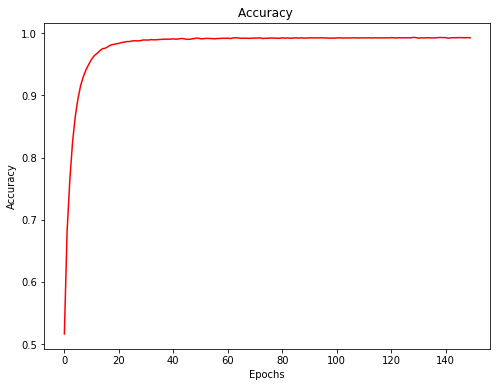

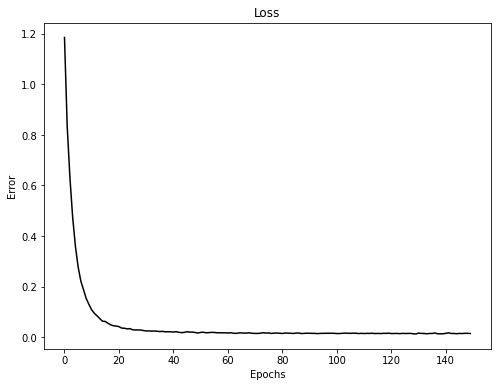

In [ ]:
acc = historial.history['accuracy']
loss = historial.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot acc and Loss
#------------------------------------------------
plt.figure(figsize=(8, 6));
plt.plot(epochs, acc, 'red', label='acc')
plt.title('Accuracy ')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show();
plt.figure(figsize=(8, 6));
plt.title('Loss')
plt.plot(epochs, loss, 'black', label='loss')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show();

In [ ]:
label2int = {
  "anger": 0,
  "joy": 1,
  "love": 2,
  "sadness": 3,
  "surprise": 4
}

In [ ]:
x_train

array([[    0,     0,     0, ...,   225,   376,   357],
       [    0,     0,     0, ...,  6916,   440, 12002],
       [    0,     0,     0, ...,  7952,   220,  1230],
       ...,
       [    0,     0,     0, ...,  2925,    21,  1367],
       [    0,     0,     0, ...,   498,   366,   969],
       [    0,     0,     0, ...,     0,     0,   878]], dtype=int32)

In [ ]:
#Almacenamiento de los datos nunpy
np.save('data/x_train1.npy', x_train)
np.save('data/y_train1.npy', y_train)
# np.save('data/x_val.npy', x_val)
# np.save('data/y_val.npy', y_val)
np.save('data/x_test1.npy', x_test)
np.save('data/y_test1.npy', y_test)

**Resultados en test**

In [ ]:
predict = model.predict(x_test)
sorting = (-y_test).argsort()
sorting_predicted = (-predict).argsort()
print(classification_report(sorting[:,0],
                            sorting_predicted[:,0],
                            target_names=label2int.keys(),
                            digits=len(label2int)))

              precision    recall  f1-score   support

       anger    0.53656   0.52986   0.53319      5124
         joy    0.61111   0.59172   0.60126      5893
        love    0.50362   0.54156   0.52190      5787
     sadness    0.63556   0.67494   0.65466      5036
    surprise    0.35962   0.26321   0.30396      1854

    accuracy                        0.55807     23694
   macro avg    0.52929   0.52026   0.52299     23694
weighted avg    0.55425   0.55807   0.55524     23694



**Conclusion**
Para el analisis de los resultados en test, podemos decir que nuestro modelo converge muy rapido a el 99%, lo que nos lleva a pensar que el modelo no puede ser muy confiable debido a que lo mas probable es que tengamos un caso de sobreentrenamiento, que en test se comprueba que así es, pero ahora esto nos lleva tambien a comparar que este modelo con respecto al otro modelo medio mejores resultados, esto debido a que en el primero obtuve una precision del 96% en entrenamiento y en el testeo obtuvimos un 25% de precision, llevandonos a analizar que nuestro modelo no es el mejor, ademas de que el dataset usado tenia 20000 muestras y pues como muy poco para llegar a un modelo mas real, por eso se procedio a buscar  mas datos para agrandar nuestro dataset y poder tener una mejor base para lograr mejores predicciones ademas de añadir metodos de pre-tratado que pudieran ayudar en el procesesamiento de texto y ayudarnos a mejorar la precision de nuestro modelo, obteniendo una mejor aunque no la que esperabamos lectura de mis datos de test.

##### Experimento 4, modelo 4 GRU


**Carga de datos de Entrenamiento y Test**
Cargamos los datos que usamos para entrenar el modelo LSTM ahora con nuestro modelo GRU

In [ ]:
#Carga de datos
x_train = np.load('data/x_train1.npy')
y_train = np.load('data/y_train1.npy')

print("Entrenamiento: ",x_train.shape,y_train.shape)
x_test = np.load('data/x_test1.npy')
y_test = np.load('data/y_test1.npy')

print("Test: ",x_test.shape,y_test.shape)
max_len = 150
max_words = x_train.shape[0]+x_test.shape[0]
print(max_words)

Entrenamiento:  (55286, 150) (55286, 5)
Test:  (23694, 150) (23694, 5)
78980


In [ ]:
#Funcion para crear el modelo, recibe el max de palabras
def crear_modeloGRU(max_words):
  #Modelo sequencial de agregacion de capas
  model = tf.keras.models.Sequential()
  #Para este caso el word embedding sera relacionado a la dimension de nuestro conjunto de palabras
  model.add(tf.keras.layers.Embedding(max_words,64, input_length=max_len))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=128, activation='tanh',name='bigru_layer1')))
  #Agregamos una capa de Dropout del 30% de las neuronas
  model.add(tf.keras.layers.Dropout(0.3))
  #Capa intermedia densa
  model.add(tf.keras.layers.Dense(units=256,activation=tf.keras.activations.relu))
  #Capa final del onehot Encoding
  model.add(tf.keras.layers.Dense(5,activation=tf.keras.activations.softmax))
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam())
  # Presentacion de la arquitectura
  model.summary()
  return model

In [ ]:
#Creamos el modelo
model_gru = crear_modeloGRU(max_words)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 64)           5054720   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               148992    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1285      
Total params: 5,270,789
Trainable params: 5,270,789
Non-trainable params: 0
_________________________________________________________________


Empezamos el entrenamiento, pero antes definimos las funciones de callbacks, una para detener el entrenamiento cuando no mejore mas y la otra para ir almacenando el modelo luego de cada entrenamiento

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('models/sentimiento_modelGRU_v1.h5', monitor='loss', save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss')

In [ ]:
#Definimos una funcion de CALLBACK para detener el modelo cuando 
tic()
historial = model_gru.fit(x_train,y_train, epochs=110, callbacks=[model_checkpoint])
tac()

Epoch 1/110
1728/1728 [==============================] - 214s 124ms/step - loss: 1.1631 - accuracy: 0.5215
Epoch 2/110
1728/1728 [==============================] - 213s 123ms/step - loss: 0.8219 - accuracy: 0.6858
Epoch 3/110
1728/1728 [==============================] - 212s 123ms/step - loss: 0.6298 - accuracy: 0.7659
Epoch 4/110
1728/1728 [==============================] - 212s 123ms/step - loss: 0.4773 - accuracy: 0.8242
Epoch 5/110
1728/1728 [==============================] - 212s 123ms/step - loss: 0.3578 - accuracy: 0.8679
Epoch 6/110
1728/1728 [==============================] - 212s 123ms/step - loss: 0.2751 - accuracy: 0.8964
Epoch 7/110
1728/1728 [==============================] - 210s 122ms/step - loss: 0.2189 - accuracy: 0.9181
Epoch 8/110
1728/1728 [==============================] - 211s 122ms/step - loss: 0.1796 - accuracy: 0.9302
Epoch 9/110
1728/1728 [==============================] - 211s 122ms/step - loss: 0.1520 - accuracy: 0.9413
Epoch 10/110
1728/1728 [=============

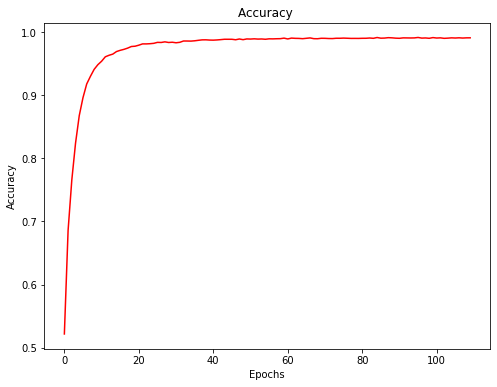

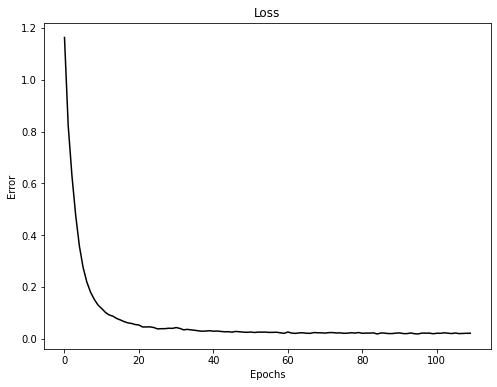

In [ ]:
acc = historial.history['accuracy']
loss = historial.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot acc and Loss
#------------------------------------------------
plt.figure(figsize=(8, 6));
plt.plot(epochs, acc, 'red', label='acc')
plt.title('Accuracy ')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show();
plt.figure(figsize=(8, 6));
plt.title('Loss')
plt.plot(epochs, loss, 'black', label='loss')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show();

In [ ]:
label2int = {
  "anger": 0,
  "joy": 1,
  "love": 2,
  "sadness": 3,
  "surprise": 4
}

In [ ]:
x_train

array([[    0,     0,     0, ...,   225,   376,   357],
       [    0,     0,     0, ...,  6916,   440, 12002],
       [    0,     0,     0, ...,  7952,   220,  1230],
       ...,
       [    0,     0,     0, ...,  2925,    21,  1367],
       [    0,     0,     0, ...,   498,   366,   969],
       [    0,     0,     0, ...,     0,     0,   878]], dtype=int32)

In [ ]:
#Almacenamiento de los datos nunpy
np.save('data/x_train1.npy', x_train)
np.save('data/y_train1.npy', y_train)
# np.save('data/x_val.npy', x_val)
# np.save('data/y_val.npy', y_val)
np.save('data/x_test1.npy', x_test)
np.save('data/y_test1.npy', y_test)

**Resultados en test**

In [ ]:
predict = model_gru.predict(x_test)
sorting = (-y_test).argsort()
sorting_predicted = (-predict).argsort()
print(classification_report(sorting[:,0],
                            sorting_predicted[:,0],
                            target_names=label2int.keys(),
                            digits=len(label2int)))

              precision    recall  f1-score   support

       anger    0.52521   0.54684   0.53581      5124
         joy    0.59334   0.61055   0.60182      5893
        love    0.51940   0.51823   0.51881      5787
     sadness    0.68389   0.62033   0.65056      5036
    surprise    0.31490   0.33172   0.32309      1854

    accuracy                        0.55449     23694
   macro avg    0.52735   0.52553   0.52602     23694
weighted avg    0.55800   0.55449   0.55582     23694



**Conclusion**

Para el analisis de los resultados en test, podemos decir que nuestro modelo converge muy rapido a el 99%, lo que nos lleva a pensar que el modelo no puede ser muy confiable debido a que lo mas probable es que tengamos un caso de sobreentrenamiento, que en test se comprueba que así es, pero ahora esto nos lleva tambien a comparar que este modelo con respecto al otro modelo medio mejores resultados, esto debido a que en el primero obtuve una precision del 96% en entrenamiento y en el testeo obtuvimos un 25% de precision, llevandonos a analizar que nuestro modelo no es el mejor, ademas de que el dataset usado tenia 20000 muestras y pues como muy poco para llegar a un modelo mas real, por eso se procedio a buscar  mas datos para agrandar nuestro dataset y poder tener una mejor base para lograr mejores predicciones ademas de añadir metodos de pre-tratado que pudieran ayudar en el procesesamiento de texto y ayudarnos a mejorar la precision de nuestro modelo, obteniendo una mejor aunque no la que esperabamos lectura de mis datos de test.

##### Experimento 5, modelo 5-6

En el siguiente experimento se pretende implementar al menos dos nuevas arquitecturas radicalmente diferentes a las 2 previamente mostradas

##### Experimento 6, modelo 7

En el siguiente experimento se pretende retomar algun modelo previo con la particularidad de implementar un WordEmbedding pre-entrenado mucho mas robusto.

## Conclusiones finales

- 
- 
- 
- 
- 

## 5. Referencias

- Sentiment analysis [[++](https://www.kaggle.com/adithyansukumar/sentiment-analysis)]
- Classify Emotions in text with BERT [[++](https://www.kaggle.com/praveengovi/classify-emotions-in-text-with-bert)]
- 
NLP-News [[++](https://www.kaggle.com/dionesiusap/nlp-news)]
- Where can I get an Emotion Dataset which contains phrases and their associated emotions ? [[++](https://www.researchgate.net/post/Where_can_I_get_an_Emotion_Dataset_which_contains_phrases_and_their_associated_emotions)]
- WASSA-2017 Shared Task on Emotion Intensity (EmoInt) [[++](http://saifmohammad.com/WebPages/EmotionIntensity-SharedTask.html)]
- lukasgarbas/nlp-text-emotion [[++](https://github.com/lukasgarbas/nlp-text-emotion/tree/master/data)]
- rgap/simbig2016-facebook-reactions [[++](https://github.com/rgap/simbig2016-facebook-reactions/tree/master/1_notebooks/data)]
- Trump's Facebook Statuses [[++](https://data.world/bgadoci/trumps-facebook-statuses)]
- Facebook Reactions [[++](https://www.kaggle.com/johanabrahamsson/facebook-reactions)]
- 2012-2016 Facebook Posts [[++](https://data.world/martinchek/2012-2016-facebook-posts)]
